# Experiment4 社区检测(Community Detection)

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

## 加载数据集

In [2]:
G = nx.read_gexf("./data/911 hijackers.gexf")

## 凝聚子群分析

In [3]:
len(G)

69

### 连通分量（Components）

+ 计算网络中连通分量数量

In [4]:
nx.number_connected_components(G)

3

+ 计算每个连通分量节点数量

In [5]:
for i in nx.connected_components(G):
    print(len(i))

63
4
2


+ 绘制每个连通分量节点数量

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 2. ,  8.1, 14.2, 20.3, 26.4, 32.5, 38.6, 44.7, 50.8, 56.9, 63. ]),
 <a list of 10 Patch objects>)

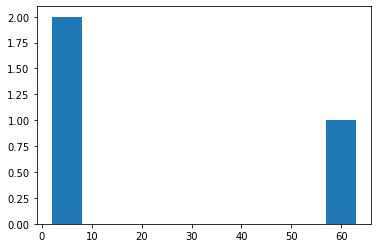

In [6]:
x=[len(c) for c in nx.connected_components(G)]
plt.hist(x)

+ 连通分量中节点数量大于10的连通分量

In [7]:
[len(c) for c in nx.connected_components(G) if len(c) > 10]

[63]

+ 绘制最大连通分量的子图

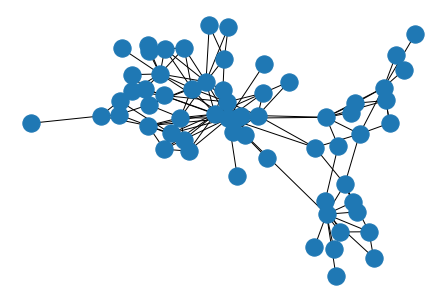

In [8]:
cc = G.subgraph(sorted(list(nx.connected_components(G)), key=lambda x:len(x), reverse=True)[0]) 
nx.draw(cc, with_labels=False)

### 三元闭包（Triangles）

In [9]:
triangles=nx.triangles(cc)
sorted(triangles.items(), key = lambda x:x[1], reverse=True)[:10]

[('Marwan Al-Shehhi', 44),
 ('Mohamed Atta', 40),
 ('Hani Hanjour', 23),
 ('Ziad Jarrah', 21),
 ('Abdul Aziz Al-Omari', 20),
 ('Ramzi Bin al-Shibh', 19),
 ('Fayez Ahmed', 17),
 ('Said Bahaji', 15),
 ('Satam Suqami', 15),
 ('Wail Alshehri', 14)]

### 派系（Cliques）

+ “派系”指的是至少包含3个点的最大完备子图。

In [10]:
cliques = list(nx.find_cliques(cc))
cliques[:10]

[['Mohand Alshehri', 'Fayez Ahmed'],
 ['Mohand Alshehri', 'Hamza Alghamdi'],
 ['Jean-Marc Grandvisir', 'Djamal Beghal'],
 ['Abu Zubeida', 'Djamal Beghal'],
 ['Mohamed Bensakhria', 'Essid Sami Ben Khemais', 'Lased Ben Heni'],
 ['Mohamed Bensakhria', 'Essid Sami Ben Khemais', 'Tarek Maaroufi'],
 ['Mohamed Bensakhria', 'Essid Sami Ben Khemais', 'Mehdi Khammoun'],
 ['Nabil Almarabh', 'Raed Hijazi'],
 ['Essoussi Laaroussi', 'Essid Sami Ben Khemais', 'Tarek Maaroufi'],
 ['Fahid al Shakri', 'Essid Sami Ben Khemais']]

### 聚类算法（Hierarchical Clustering）

In [11]:
from collections import defaultdict
import networkx as nx
import numpy
from scipy.cluster import hierarchy
from scipy.spatial import distance
import matplotlib.pyplot as plt


def create_hc(G, t=1.0):
    # 创建一个最短路径距离矩阵，同时保留节点标签
    labels=G.nodes()    
    path_length=nx.all_pairs_shortest_path_length(G)
    distances=numpy.zeros((len(G),len(G))) 
    i=0   
    for u,p in path_length:
        j=0
        for v,d in p.items():
            distances[i][j]=d
            distances[j][i]=d
            if i==j: distances[i][j]=0
            j+=1
        i+=1
    
    # 创建层次聚类（ hierarchical cluster）
    Y=distance.squareform(distances)
    Z=hierarchy.complete(Y)  
    membership=list(hierarchy.fcluster(Z,t=t))
    partition=defaultdict(list)
    for n, p in zip(list(G.nodes()), membership):
        partition[p].append(labels[n]['label'])
    return list(partition.values())

In [12]:
create_hc(G)

[['Hani Hanjour',
  'Majed Moqed',
  'Khalid Al-Mihdhar',
  'Rayed Mohammed Abdullah',
  'Hamza Alghamdi',
  'Abdul Aziz Al-Omari'],
 ['Nawaf Alhazmi',
  'Osama Awadallah',
  'Mohand Alshehri',
  'Ahmed Alghamdi',
  'Ahmed Al Haznawi',
  'Djamal Beghal',
  'Jerome Courtaillier',
  'David Courtaillier',
  'Ahmed Ressam',
  'Kamel Daoudi',
  'Tarek Maaroufi',
  'Faisal Al Salmi',
  'Mohamed Abdi',
  'Mamoun Darkazanli',
  'Ahmed Khalil Ibrahim Samir Al-Ani',
  'Agus Budiman',
  'Mounir El Motassadeq ',
  'Abdelghani Mzoudi',
  'Imad Eddin Barakat Yarkas',
  'Nabil al-Marabh',
  'Abu Qatada',
  'Mamduh Mahmud Salim',
  'Mohammed Belfas',
  'Haydar Abu Doha',
  'Mehdi Khammoun',
  'Fahid al Shakri',
  'Ahmen Hannan'],
 ['Lotfi Raissi', 'Saeed Alghamdi', 'Ziad Jarrah', 'Mohammad Pervez'],
 ['Bandar Alhazmi', 'Salem Alhazmi', 'Mohamed Atta'],
 ['Ahmed Alnami', 'Marwan Al-Shehhi'],
 ['Abdussattar Shaikh', 'Essid Sami Ben Khemais'],
 ['Said Bahaji'],
 ['Ramzi Bin al-Shibh'],
 ['Zakariya Essaba

### 模块度算法（Modularity-based communities）

In [13]:
from networkx.algorithms.community import greedy_modularity_communities
 
list(greedy_modularity_communities(G))

[frozenset({'Abdelghani Mzoudi',
            'Abdul Aziz Al-Omari',
            'Abdussattar Shaikh',
            'Agus Budiman',
            'Ahmed Al Haznawi',
            'Ahmed Alghamdi',
            'Ahmed Alnami',
            'Ahmed Khalil Ibrahim Samir Al-Ani',
            'Bandar Alhazmi',
            'Faisal Al Salmi',
            'Fayez Ahmed',
            'Hamza Alghamdi',
            'Hani Hanjour',
            'Imad Eddin Barakat Yarkas',
            'Khalid Al-Mihdhar',
            'Lotfi Raissi',
            'Majed Moqed',
            'Mamduh Mahmud Salim',
            'Mamoun Darkazanli',
            'Marwan Al-Shehhi',
            'Mohamed Abdi',
            'Mohamed Atta',
            'Mohammed Belfas',
            'Mohand Alshehri',
            'Mounir El Motassadeq ',
            'Mustafa Ahmed al-Hisawi',
            'Nabil Almarabh',
            'Nabil al-Marabh',
            'Nawaf Alhazmi',
            'Osama Awadallah',
            'Raed Hijazi',
            'R

### 标签传播法（Label Propagation）

In [14]:
from networkx.algorithms.community import label_propagation

list(label_propagation.label_propagation_communities(G))

[{'Abu Qatada',
  'Abu Walid',
  'Abu Zubeida',
  'David Courtaillier',
  'Djamal Beghal',
  'Jean-Marc Grandvisir',
  'Jerome Courtaillier',
  'Kamel Daoudi',
  'Nizar Trabelsi',
  'Zacarias Moussaoui'},
 {'Ayub Ali Khan',
  'Mohammad Pervez',
  'Mohammed Jaweed Azmath',
  'Usman Bandukra'},
 {'Bandar Alhazmi', 'Faisal Al Salmi', 'Rayed Mohammed Abdullah'},
 {'Abdelghani Mzoudi',
  'Agus Budiman',
  'Ahmed Al Haznawi',
  'Ahmed Khalil Ibrahim Samir Al-Ani',
  'Hani Hanjour',
  'Imad Eddin Barakat Yarkas',
  'Lotfi Raissi',
  'Mamduh Mahmud Salim',
  'Mamoun Darkazanli',
  'Marwan Al-Shehhi',
  'Mohamed Atta',
  'Mohammed Belfas',
  'Mounir El Motassadeq ',
  'Ramzi Bin al-Shibh',
  'Said Bahaji',
  'Zakariya Essabar',
  'Ziad Jarrah'},
 {'Abdussattar Shaikh',
  'Khalid Al-Mihdhar',
  'Majed Moqed',
  'Mohamed Abdi',
  'Nawaf Alhazmi',
  'Osama Awadallah',
  'Salem Alhazmi'},
 {'Ahmed Alghamdi',
  'Ahmed Alnami',
  'Hamza Alghamdi',
  'Mohand Alshehri',
  'Nabil Almarabh',
  'Nabil al-